<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_143_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 143

## Introduction to Bayesian Inference

!['Detector! What would the Bayesian statistician say if I asked him whether the--' [roll] 'I AM A NEUTRINO DETECTOR, NOT A LABYRINTH GUARD. SERIOUSLY, DID YOUR BRAIN FALL OUT?' [roll] '... yes.'](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

*[XKCD 1132](https://www.xkcd.com/1132/)*


## Prepare - Bayes' Theorem and the Bayesian mindset

Bayes' theorem possesses a near-mythical quality - a bit of math that somehow magically evaluates a situation. But this mythicalness has more to do with its reputation and advanced applications than the actual core of it - deriving it is actually remarkably straightforward.

### The Law of Total Probability

By definition, the total probability of all outcomes (events) if some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities (their likelihoods considered independently, without reference to one another) and their conditional probabilities (their likelihoods considered jointly). A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.

### Bayes Theorem

Here is is, the seemingly magic tool:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. These unconditioned probabilities are referred to as "prior beliefs", and the conditioned probabilities as "updated."

Why is this important? Scroll back up to the XKCD example - the Bayesian statistician draws a less absurd conclusion because their prior belief in the likelihood that the sun will go nova is extremely low. So, even when updated based on evidence from a detector that is $35/36 = 0.972$ accurate, the prior belief doesn't shift enough to change their overall opinion.

There's many examples of Bayes' theorem - one less absurd example is to apply to [breathalyzer tests](https://www.bayestheorem.net/breathalyzer-example/). You may think that a breathalyzer test that is 100% accurate for true positives (detecting somebody who is drunk) is pretty good, but what if it also has 8% false positives (indicating somebody is drunk when they're not)? And furthermore, the rate of drunk driving (and thus our prior belief)  is 1/1000.

What is the likelihood somebody really is drunk if they test positive? Some may guess it's 92% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drunk driving. Sounds like a job for Bayes' theorem!

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive | Drunk)P(Drunk)}{P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In other words, the likelihood that somebody is drunk given they tested positive with a breathalyzer in this situation is only 1.25% - probably much lower than you'd guess. This is why, in practice, it's important to have a repeated test to confirm (the probability of two false positives in a row is $0.08 * 0.08 = 0.0064$, much lower), and Bayes' theorem has been relevant in court cases where proper consideration of evidence was important.

## Live Lecture - Deriving Bayes' Theorem, Calculating Bayesian Confidence

Notice that $P(A|B)$ appears in the above laws - in Bayesian terms, this is the belief in $A$ updated for the evidence $B$. So all we need to do is solve for this term to derive Bayes' theorem. Let's do it together!

$x = 2$ is an inline equation

$$
x = 2
$$

is a block equation.

$$
\begin{aligned}
x &= 2\\
&= 1 + 1
\end{aligned}
$$

Now let's derive Bayes!

$$
\begin{aligned}
P(A|B) &= \frac{P(A \cap B)}{P(B)}\\
\Rightarrow P(A|B)P(B) &= P(A \cap B)\\
P(B|A) &= \frac{P(B \cap A)}{P(A)}\\
\Rightarrow P(B|A)P(A) &= P(B \cap A)\\
P(A \cap B) &= P(B \cap A)\\
\Rightarrow P(A|B)P(B) &= P(B|A)P(A)
\\
\Rightarrow P(A|B) &=  \frac{P(B|A) \times P(A)}{P(B)}
\end{aligned}
$$

In [0]:
# Activity 2 - Use SciPy to calculate Bayesian confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs

from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1]


In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Takes data, returns (mean, lower bound, upper bound)
  """
  n = len(data)
  mean = sum(data) / n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

# Bad name: JavaCarFactoryFactoryDriverClassSubClass
# Also a bad name: x
# Try to find the balance!

In [0]:
confidence_interval(coinflips, confidence=0.99)

(0.4, 0.2706847345829171, 0.529315265417083)

In [0]:
confidence_interval(coinflips, confidence=1.1)

(0.4, nan, nan)

In [0]:
help(stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [0]:
stats.bayes_mvs(coinflips, alpha=0.99)

(Mean(statistic=0.4, minmax=(0.2706847345829171, 0.529315265417083)),
 Variance(statistic=0.24742268041237114, minmax=(0.17267828928836013, 0.36084742147255444)),
 Std_dev(statistic=0.4961356766559939, minmax=(0.41554577279568145, 0.6007057694683433)))

In [0]:
help(stats.mvsdist)

Help on function mvsdist in module scipy.stats.morestats:

mvsdist(data)
    'Frozen' distributions for mean, variance, and standard deviation of data.
    
    Parameters
    ----------
    data : array_like
        Input array. Converted to 1-D using ravel.
        Requires 2 or more data-points.
    
    Returns
    -------
    mdist : "frozen" distribution object
        Distribution object representing the mean of the data
    vdist : "frozen" distribution object
        Distribution object representing the variance of the data
    sdist : "frozen" distribution object
        Distribution object representing the standard deviation of the data
    
    See Also
    --------
    bayes_mvs
    
    Notes
    -----
    The return values from ``bayes_mvs(data)`` is equivalent to
    ``tuple((x.mean(), x.interval(0.90)) for x in mvsdist(data))``.
    
    In other words, calling ``<dist>.mean()`` and ``<dist>.interval(0.90)``
    on the three distribution objects returned from this func

In [0]:
coinflips_mean_dist, _, _ = stats.mvsdist(coinflips)
coinflips_mean_dist

In [0]:
help(coinflips_mean_dist.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(size=None, random_state=None) method of scipy.stats._distn_infrastructure.rv_frozen instance



In [0]:
coinflips_mean_dist.mean()

0.4

In [0]:
import pandas as pd
pd.DataFrame(coinflips).describe()

,0
count,100.000000
mean,0.400000
std,0.492366
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:
coinflips_mean_dist.rvs(100)  # Bootstrapping! (or the atom of it)

array([0.35943745, 0.37146884, 0.45569571, 0.42599565, 0.37608118,
       0.46700873, 0.42640951, 0.34659443, 0.35380485, 0.45567888,
       0.44532795, 0.49123792, 0.34953675, 0.34647169, 0.42006728,
       0.41318424, 0.36547381, 0.41136929, 0.42656771, 0.41305304,
       0.3554256 , 0.39315319, 0.27828892, 0.36235343, 0.41120708,
       0.38046218, 0.38532577, 0.29947893, 0.33943933, 0.29424763,
       0.37074188, 0.39900053, 0.43727812, 0.38550922, 0.43163546,
       0.41689431, 0.40130138, 0.47489356, 0.4058945 , 0.36400607,
       0.4375243 , 0.48032106, 0.39560034, 0.37488479, 0.41074598,
       0.31578337, 0.3263916 , 0.37646216, 0.39705453, 0.46125903,
       0.47670832, 0.3418216 , 0.40587084, 0.43573981, 0.39781115,
       0.34527347, 0.42446375, 0.46084496, 0.40721963, 0.35931413,
       0.38275184, 0.4846519 , 0.41340888, 0.36854448, 0.4253964 ,
       0.42006874, 0.46307232, 0.38476352, 0.40280751, 0.43390148,
       0.34031929, 0.3288314 , 0.41825436, 0.40062326, 0.41539

## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# Function to calculate and visualiza a range of situations
# pass in probabilities as decimals

def prob_drunk_given_positive(prob_positive, prob_drunk_prior, prob_positive_drunk):
  p = (prob_positive * prob_drunk_prior) / prob_positive_drunk
  print('The likelihood someone is truly drunk given they tested positive is', str(p*100)+'%')

In [2]:
prob_drunk_given_positive(1, .001, 0.08)

The likelihood someone is truly drunk given they tested positive is 1.25%


In [0]:
# Hypothesis: person is drunk
# evidence: positive breathalyzer test

# when the person is truly over (blood test) alcohol limit,
# the breathalyzer will work 100% of the time.

# 1 in 1000 drivers drive drunk, so the probability of any
# driver being drunk is 0.1%.

# The breathalyzer gives a positive result 8% of the time,
# regardless if it's accurate or not.

# We want to know the probability of someone actually being drunk
# given the breathalyzer test is positive.

# P(A) - The probability of a driver being drunk
# P(B|A) - Given a truly drunk driver, what's the probability the test works?
# P(B) - The probability of a breathalyzer test being positive

In [4]:
# Visualize a range of situations

# Let's see what happens when we have different breathalyzers,
# and different number of drivers that drive drunk

# What if every 10/1000 drivers were drunk?

prob_drunk_given_positive(1, 0.01, 0.08)

# and...what if the breathalyzer gave a false positive only 5% of the time?

prob_drunk_given_positive(1, 0.01, 0.05)

# and...what if the breathalyzer only truly works 80% of the time

prob_drunk_given_positive(1, 0.005, 0.08)

The likelihood someone is truly drunk given they tested positive is 12.5%
The likelihood someone is truly drunk given they tested positive is 20.0%
The likelihood someone is truly drunk given they tested positive is 6.25%


## Visualize the range of situations (to be finished...)

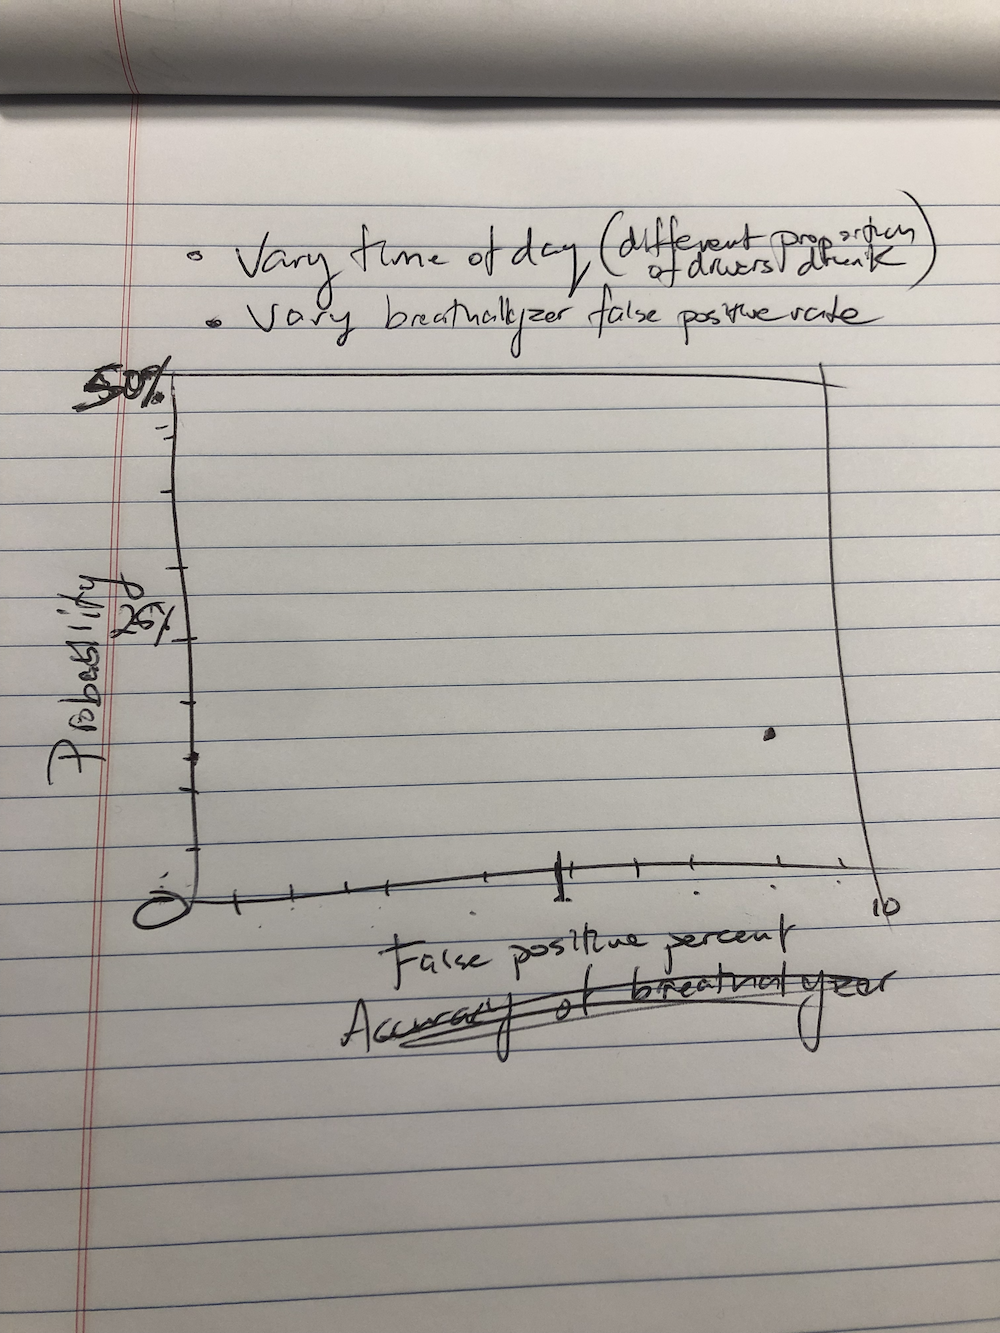

In [49]:
from IPython.display import Image
Image('IMG_4242.png',width=400, height=400)


## Visualizing Bayesian vs Frequentist 

In [5]:
# Data on 1000 coinflips where 1 indicates a head

import numpy as np
flips = np.random.randint(2, size=1000)
# print('Data on 1000 coinflips', len(flips))

# Bernoulli distribution takes one parameter p which is the probability
# of getting a 1 or a head for a coin flip and returns a value of 1
# with a probability p and a value of 0 with probability (1-p)

# Sampling distribution allows us to specify how we think this data
# was generated

bernoulli = np.random.binomial(n=1, p=.5, size=1000)
print(bernoulli.mean())

# Get the probability mass function for the bernoulli distribution
# to get the probability of a single coin flip. If the data point is
# 0, it returns (1-p)

def bern_pmf(x, p):
  if x == 1:
    return p
  elif x == 0:
    return 1 - p
  else:
    return "Value Not in Support of Distribution"
  
# Use this function to get the probability of a data point

print(bern_pmf(1, .5))
print(bern_pmf(0, .5))

0.493
0.5
0.5


In [18]:
# Draw from the probability mass function using SciPy

import scipy.stats as st
print("The probability with 1:", st.bernoulli.pmf(1, .5))
print("The probability with 0:", st.bernoulli.pmf(0, .5))

# See the probability of all 1000 data points
# this assumes that our data is independent and identically distributed

print(np.product(st.bernoulli.pmf(flips, .5)))

The probability with 1: 0.5
The probability with 0: 0.5
9.332636185032189e-302


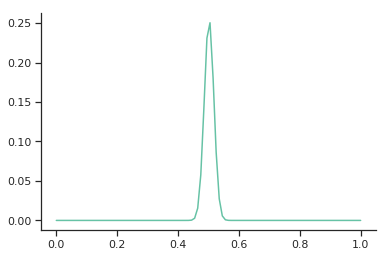

In [19]:
# Let's think about the sampling distribution vs prior distribution

# In sampling, we defined 100 values from 0 to 1 for p
# now let's define the probability we would have assumed before
# seeing any data (most likely a fair coin)

fair_flips = bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
p_fair = np.array([np.product(st.bernoulli.pmf(fair_flips, p)) for p in params])
p_fair = p_fair / np.sum(p_fair)
plt.plot(params, p_fair)
sns.despine()

**The plot of the prior shows that our prior assumption of the coinflips being fair is true.**

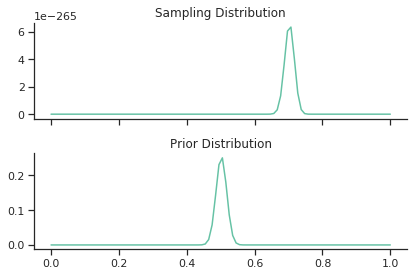

In [28]:
# Let's keep our fair prior but change the data to be an unfair coin

unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.7, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])
fix, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_unfair)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, p_fair)
axes[1].set_title("Prior Distribution")
sns.despine()
plt.tight_layout()

**p = .7 is an unfair coin, but our prior beliefs tell us that the coin is fair. To deal with this, we need to check out the posterior distribution.**

**The posterior tells us what parameters are most likely given our data.**


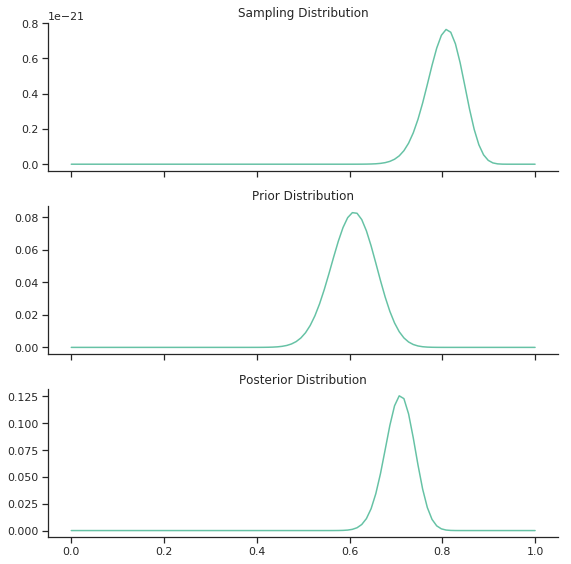

In [44]:
def bern_post(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

example_post = bern_post(n_sample=100)

**Note: increasing n_sample to 1000 brings the posterior distribution closer to our likelihood.**